# Real estate valuation
## 1. Aim and objectives
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/Taiwan_2009_Taipei_Xindian_FRD_7087.jpg/1600px-Taiwan_2009_Taipei_Xindian_FRD_7087.jpg" title="Taiwan 2009 Taipei Xindian FRD 7087.jpg" />
PHOTO: Fred Hsu on Wikipedia

Examining real estate valuation helps understand where people tend to live in a city. The higher the price, the greater the demand to live in the property. Predicting real estate valuation can help urban design and urban policies, as it could help identify what factors have the most impact on property prices. Our aim is to predict real estate value, based on several features.

Our objectives is to:
1. Understand the data available
2. Test rapidly different regression models
3. Assess the best model(s) and improve them
4. Present the results and what could be further addressed.

The source of data is the __[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)__. The donor of the dataset is __[Pr. Yeh, I-Cheng](http://www.ce.tku.edu.tw/main/?q=node/291&language=en)__. This dataset deals with real estate located in Sindian district, in New Taipei city in Taiwan. There are 414 instances, which have 7 attributes: 

| Designation | Attribute | Unit | Value for example |
| --- | --- |
| X1 | Transaction date | year and month | 2013.250=2013 March, 2013.500=2013 June, etc. |
| X2 | House age | year | 32 |
| X3 | Distance to the nearest MRT station | meter | 84.87882 |
| X4 | Number of convenience stores in the living circle on foot | Integer | 10 |
| X5 | Geographic coordinate: latitude | degree | 24.98298 |
| X6 | Geographic coordinate: longitude | degree | 121.54024 |
| Y | house price of unit area | 10,000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared | 37.9|


# 2. Exploratory data analysis


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
path = " " # insert path here
df = pd.read_excel(path+"Real estate valuation data set.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


## Distribution of the variables

In [3]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


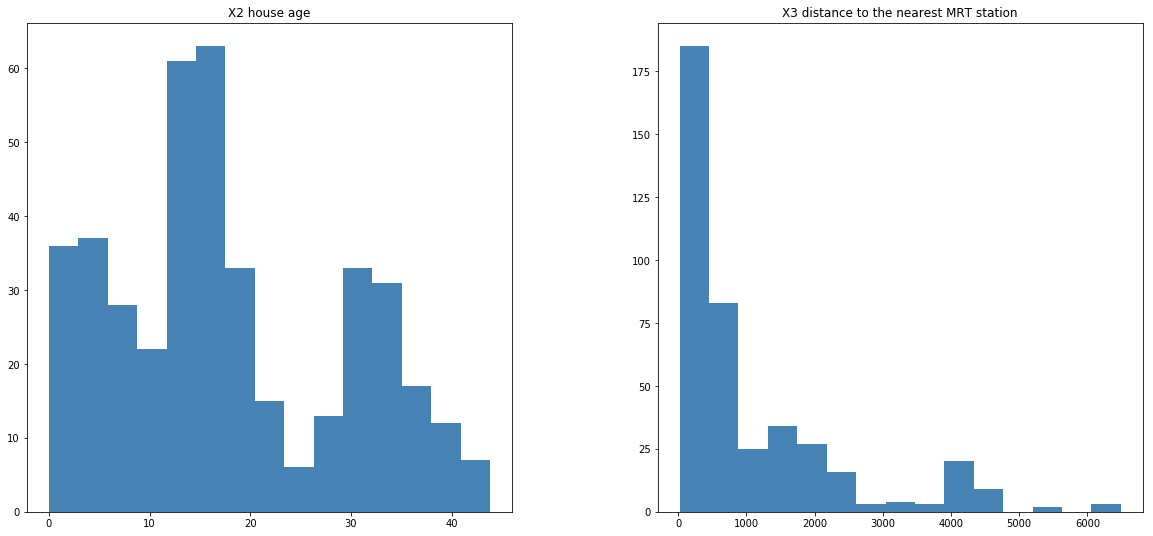

In [4]:
# visualise the distribution of continuous variables
fig = df[['X2 house age',
          'X3 distance to the nearest MRT station'
          ]].hist(bins=15,
                 color='steelblue',
                 xlabelsize=10, ylabelsize=10,
                 figsize=(20,9),
                 grid=False)

Here are a few comments on the distribution of the continuous variables:
* House age varies from 0 to 43 years, with 3 peaks: 12-18 years, 0-6 years, 30-36 years.
* Most houses are located within 1 km of the nearest MRT station.

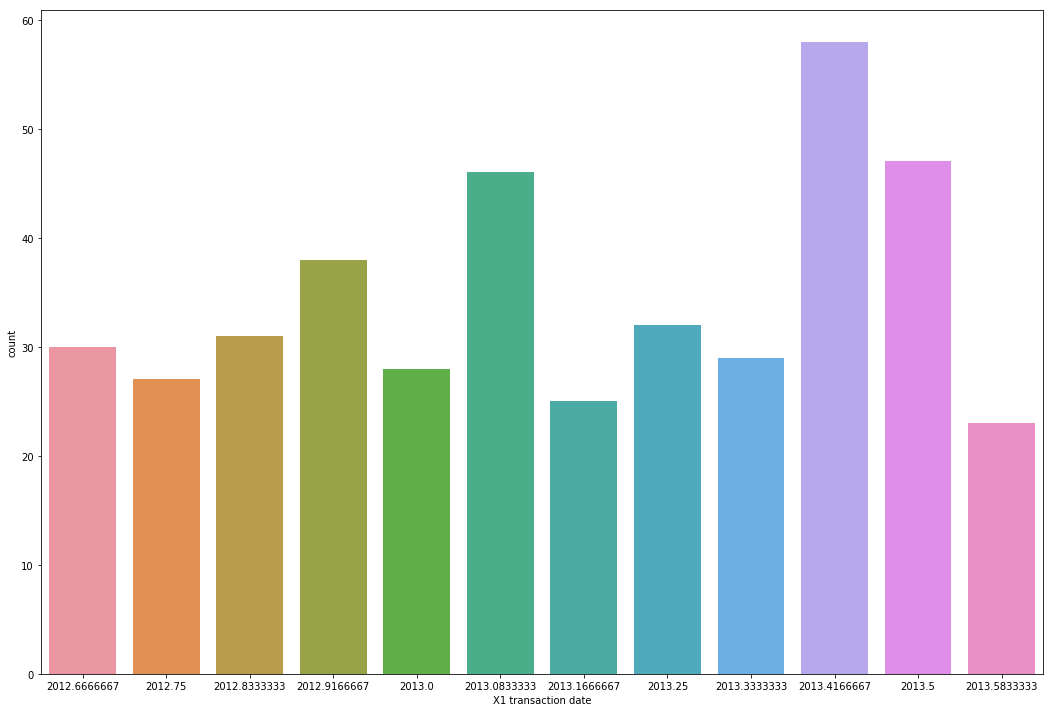

In [5]:
# visualise X1 transaction date
sns.countplot(x = 'X1 transaction date', data = df)
plt.tight_layout(rect=(0, 0, 2.5, 2.5)) 

We observed that the number of transactions had a peak in May 2013, and was higher than the average on 3 other months: November 2012, January 2013 and June 2013. 

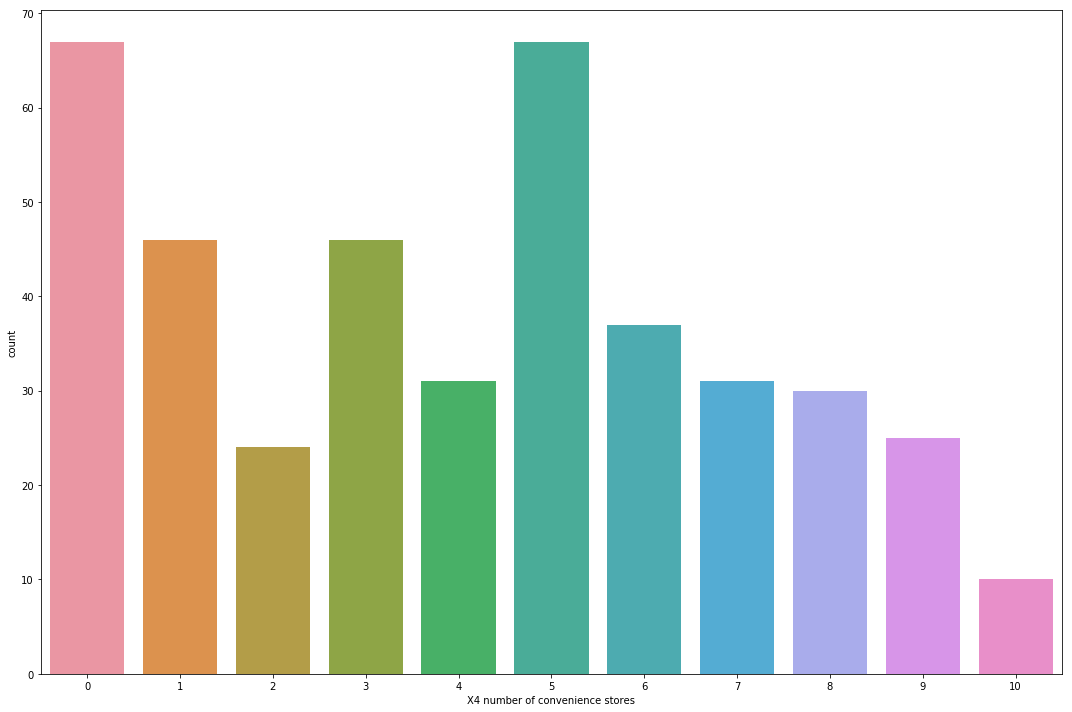

In [6]:
# visualise X4 number of convenience stores
sns.countplot(x = 'X4 number of convenience stores', data = df)
plt.tight_layout(rect=(0, 0, 2.5, 2.5)) 

* Approximately 1 house in 6 does not have any convenience store in the living circle on foot. These houses are probably located in residential areas.
* Half of the houses has between 1 and 6 convenience stores in the living circle on foot.

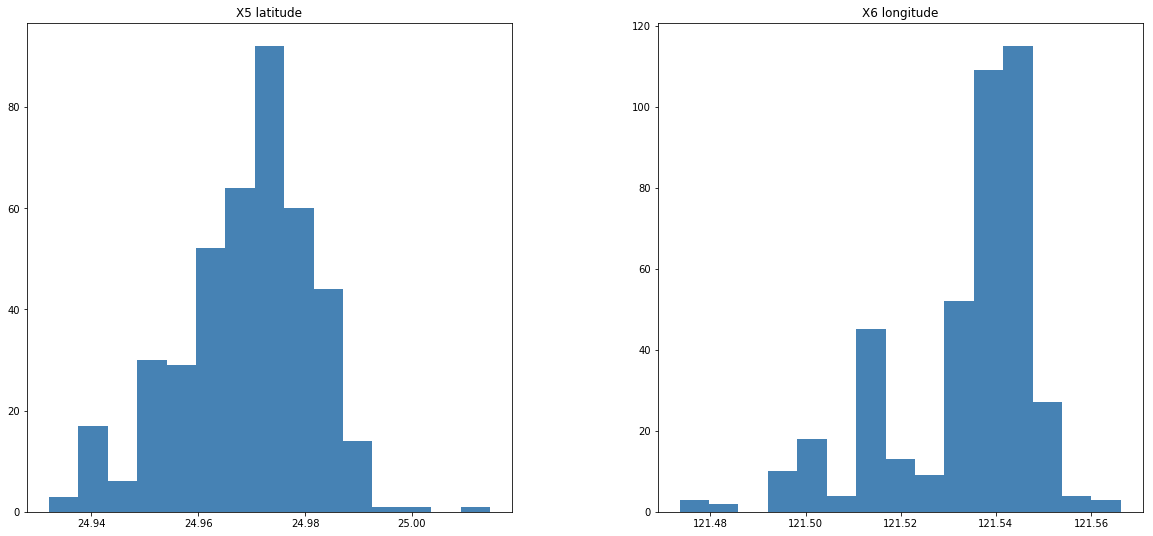

In [7]:
# visualise the distribution of latitude and longitude
fig = df[['X5 latitude',
          'X6 longitude',
          ]].hist(bins=15,
                 color='steelblue',
                 xlabelsize=10, ylabelsize=10,
                 figsize=(20,9),
                 grid=False)

Most of the houses are located in the East central part of the area within the extreme values of latitude and longitude of this dataset. It'll be more obvious when we visualise the geographical distribution on a map!

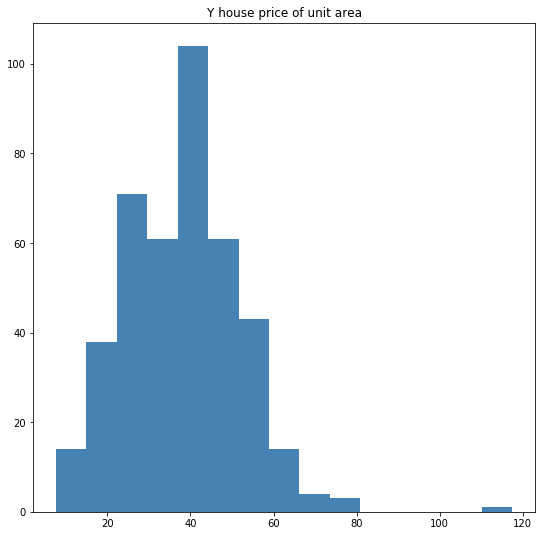

In [8]:
# visualise the distribution of Y house price of unit area
fig = df[[
          'Y house price of unit area'
          ]].hist(bins=15,
                 color='steelblue',
                 xlabelsize=10, ylabelsize=10,
                 figsize=(9,9),
                 grid=False)

In [9]:
df['Y house price of unit area'].sort_values(ascending = False).head(10)

270    117.5
220     78.3
312     78.0
166     73.6
105     71.0
16      70.1
379     69.7
389     67.7
413     63.9
361     63.3
Name: Y house price of unit area, dtype: float64

We observe the following on the distribution of house prices of unit area:
* House price of unit are varies greatly from 76,000 New Taiwan Dollar/Ping to more than 1 million New Taiwan Dollar/Ping.
* More than half of house prices of unit area  are between 250,000 and 500,000 New Taiwan Dollar/Ping.
* There are 8 houses for which the house price of unit area is more than 650,000 New Taiwan Dollar/Ping, with one being 1,115,000 New Taiwan Dollar/Ping (extreme value).

### Real estate market 2012-2013 in Taipei
As I was not familiar with Taipei real estate market, a litte research on the Internet helped me check whether the house prices of unit area from this dataset are in line with the Taipei market around the same date. Here is what I've found:
* End 2018, "House prices rose sharply from the 1990s to around 2014, dipped for a while, and are now leveling off. " based on this __[article about bying a house in Taiwan published in November 2018](https://international.thenewslens.com/article/107812)__. Then, the period of study was close to the 2014 peak.
* Based on __[another article about global property prices in Taiwan dated September 2013](https://www.globalpropertyguide.com/Asia/Taiwan/Price-History-Archive/taiwans-spectacular-house-price-rises-127203)__:
 * "Local residential property prices in Taiwan vary significantly.
 * Taipei has the most expensive housing market in Taiwan, with an average home price of TWD655,000 (USD 21,870) per ping.
 * In New Taipei City, the average house price was TWD335,000 (USD 11,186) per ping in June 2013."

In our dataset, the mean house price of unit area is 379,802 TWD/ping and the median is 384,500 TWD/ping, which is a little higher than the figure reported for the whole New Taipei city. Highest prices in our dataset are more in line with the average home price in Taipei, even though they're located in New Taipei city. 
 
## Geographical distribution of the variables

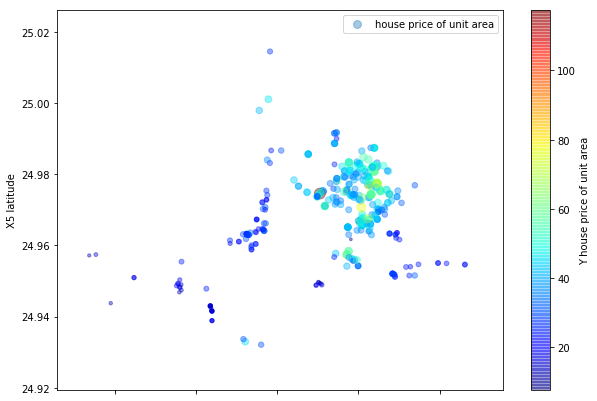

In [10]:
# visualise the geographical distribution of the house prices of unit area: X5 latitude and X6 longitude
df.plot(kind="scatter", x="X6 longitude", y="X5 latitude",
    s=df["Y house price of unit area"], label="house price of unit area",
    c='Y house price of unit area', cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

House price of unit area are not evenly distributed in the Xindian district, with lowest values observed in the Western part, and highest values observed in the North eastern part.

### Check the locations of the house with a background map
To better visualise where the properties are located in the Xindian district, I've used the __[Batch geo website](https://fr.batchgeo.com)__. I've mapped the properties on 2 maps: __[Map of the first 250 rows](https://batchgeo.com/map/41bbdf8e5872012442ede42f6c6d3cb9)__ and __[Map of the last 164 rows](https://batchgeo.com/map/58cc747dce77c72d1c5e71541e1e3646)__.
When comparing the location of the houses with the area of Xindian district on __[Google map](https://www.google.com/maps/place/Xindian,+Nouveau+Taipei,+Taïwan/@24.9464213,121.4759465,12z/data=!4m5!3m4!1s0x346803de337f4fe1:0xe29baf27fbf0968f!8m2!3d24.978282!4d121.5394822)__, we observe that Properties 36, 229 and 345 are located outside this area. Let's check their attributes!

In [11]:
df[df['No'].isin([36,229,345])]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
35,36,2013.500000,13.9,4079.418,0,25.01459,121.51816,27.3
228,229,2013.416667,11.9,3171.329,0,25.00115,121.51776,46.6
344,345,2013.500000,34.6,3085.170,0,24.99800,121.51550,41.2


Their house prices of unit area are not extreme values. However, we might exclude them from the analysis, as the combination of their features might be quite specific and different from those observed in Xindian district.
### Geographical maps and distribution house prices according to different variables using __[Tableau](https://public.tableau.com/profile/line.ton.that#!/vizhome/ExploratoryMapping/Histoire1)__
At first, I've tried to install the geopandas library to build maps directly in Python, but after several attempts and hours, I've given up, as there were always incompatibilities between the different versions of the required libraries, even when I tried to force the installation channel to conda-forge... Using a GIS tool might have been too much for this project, therefore I've used Tableau, as it was easy to load my data, visualise them on a map, and I've even discovered that we can write a story about our data. This is available at: __[Story in Tableau](https://public.tableau.com/profile/line.ton.that#!/vizhome/ExploratoryMapping/Histoire1)__.
Plotting the variables against the house price of unit area, we observe that:
* Average monthly house prices of unit area vary during the study period. On average, they are higher in 2013 than in 2012. This might be linked to inflation. 
* House prices of unit area vary with the age of the house. Highest prices are observed for new houses (less than 10 years old) and for houses that are more than 35 years old. For other houses, the house price of unit area is between 310,000 TWD/Ping and 355,000 TWD/Ping.
* Average house price of unit area tends to decrease with rising distance to the nearest MRT station, with the exception of a distance between 3 km and 4 km where price of unit area is higher than the mean house price of unit area. This might correspond to a neighbourhood that has a specific feature which make the distance to the MRT station less valuable. Almost half of the transactions deal with houses located less than 500 meters away from the nearest MRT station.
* There is a general tendency of increasing house price of unit area with an increasing number of convenience stores in the vicinity.

## Outliers
We would like to identify obvious outliers in our dataset. Based on the distribution of the Y house price of unit area, we've identify properties with very high prices that could be outliers.

Let's build a pairplot to have a closer look!

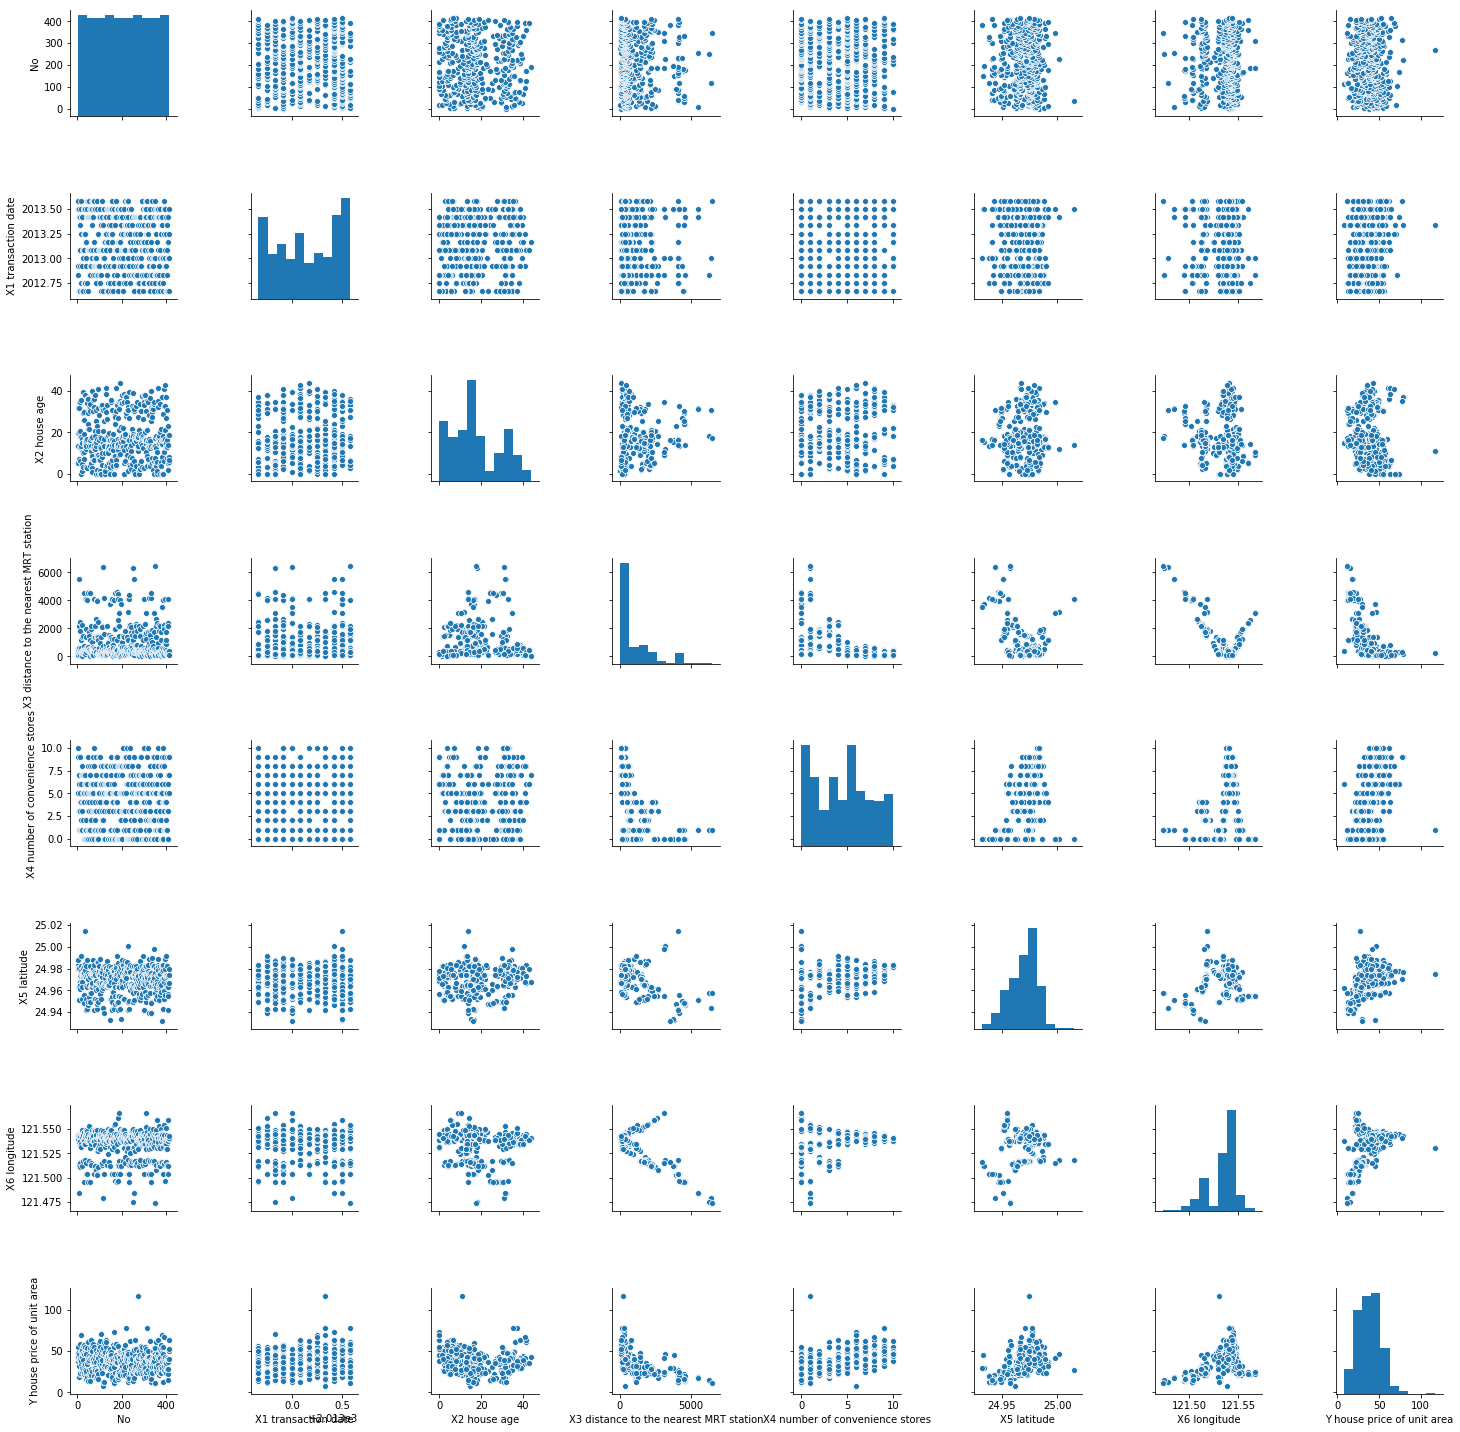

In [12]:
sns.pairplot(df)

The property with the highest house price of unit (more than 1 million TWD/Ping) seems to be an outlier. We might exclude it from our analysis (if so, we'll mention it). When looking at Google Street view, we didn't notice anything special about this property: There might be an error in the value reported. Or the property is very tiny?